# Telecom Customer Classification

## Importing the Library

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Importing the Data



In [63]:
df_raw=pd.read_csv('Telecust1.csv')

In [64]:
df=df_raw.copy()

In [65]:
df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


## Data Wrangling

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int64 
 6   ed       1000 non-null   int64 
 7   employ   1000 non-null   int64 
 8   retire   1000 non-null   int64 
 9   gender   1000 non-null   int64 
 10  reside   1000 non-null   int64 
 11  custcat  1000 non-null   object
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


In [67]:
df.shape

(1000, 12)

### Null Value Check

In [68]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

region     0.0
tenure     0.0
age        0.0
income     0.0
marital    0.0
address    0.0
ed         0.0
employ     0.0
retire     0.0
gender     0.0
reside     0.0
custcat    0.0
dtype: float64

### Describe Data

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


### Duplicate Data

In [70]:
df.duplicated().sum()

0

## Hypothesis Testing

In [71]:
columns=df.columns
columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [72]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['custcat']

In [73]:
for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

custcat 
--------------------
 Unique :4
--------------------
--------------------
C    281
A    266
D    236
B    217
Name: custcat, dtype: int64 



In [74]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['region',
 'tenure',
 'age',
 'income',
 'marital',
 'address',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside']

### ANOVA Test

In [75]:
from scipy.stats import f_oneway

In [76]:
def perform_Anova_test_regression(data_frame, list_of_column, Target_column):
    
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Categorical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalNum=[]
    for col in list_of_column:
        # Running the one-way anova test 
        # Assumption(H0) is that variable are NOT correlated

        CategoryGroupLists=data_frame.groupby(Target_column)[col].apply(list)
        #print(CategoryGroupLists)

        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value &gt; 0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        pvalNum.append(AnovaResults[1])
        #print('P-Value for Anova is: ', AnovaResults[1])
        
    dict={'P-Value of the Anova_Test':pvalNum}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the Anova_Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    return PvalueTable

In [77]:
perform_Anova_test_regression(df,numeric,'custcat')

,P-Value of the Anova_Test,Decision
region,3.503157e-01,Fail to reject Null Hypothesis
tenure,3.655169e-25,Reject Null Hypothesis
age,5.585815e-05,Reject Null Hypothesis
income,1.798626e-04,Reject Null Hypothesis
marital,1.511211e-02,Reject Null Hypothesis
address,1.547485e-05,Reject Null Hypothesis
ed,1.861950e-36,Reject Null Hypothesis
employ,9.288252e-11,Reject Null Hypothesis
retire,2.958274e-02,Reject Null Hypothesis
gender,7.724952e-01,Fail to reject Null Hypothesis


In [78]:
df.drop(['region','gender'],axis=1,inplace=True)

In [79]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['tenure',
 'age',
 'income',
 'marital',
 'address',
 'ed',
 'employ',
 'retire',
 'reside']

## Multicollinearity Check

### Pearson Correlation

<AxesSubplot:>

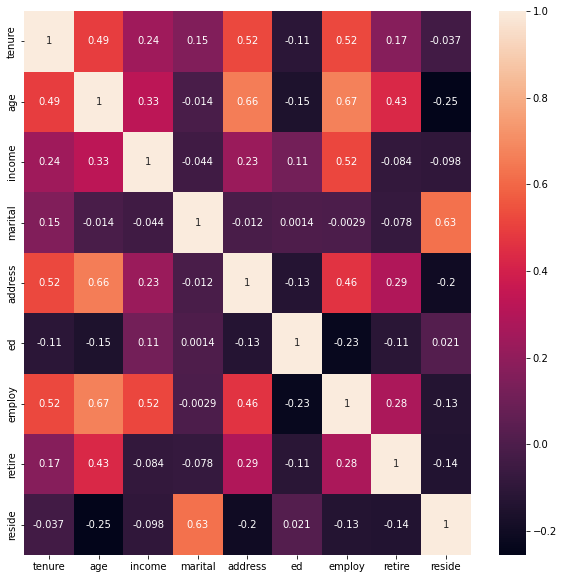

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method ='pearson'),annot=True)

In [81]:
df_numeric=df[numeric]

In [82]:
df_numeric.head()

,tenure,age,income,marital,address,ed,employ,retire,reside
0,13,44,64,1,9,4,5,0,2
1,11,33,136,1,7,5,5,0,6
2,68,52,116,1,24,1,29,0,2
3,33,33,33,0,12,2,0,0,1
4,23,30,30,1,9,1,2,0,4


### VIF

In [83]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    '''
    Take the inputs as dataframe and calculate the VIF.
    Returns Data frame with VIF value and respective column name.
    
        Parameters:
                X(Data Frame):Pandas Data Farame
        
        Returns:
                vif(Data Frame): Data frame with VIF value and respective column name.
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [84]:
calc_vif(df_numeric[:-1])

,variables,VIF
0,tenure,6.190054
1,age,15.207278
2,income,2.429568
3,marital,3.386523
4,address,4.355589
5,ed,5.311787
6,employ,5.657809
7,retire,1.343639
8,reside,5.320582


#### VIF starts at 1 and has no upper limit
#### VIF = 1, no correlation between the independent variable and the other variables
#### VIF exceeding10 indicates high multicollinearity between this independent variable and the others

#### Generally, a VIF above 4 or tolerance below 0.25 indicates that multicollinearity might exist, and further investigation is required. When VIF is higher than 10 or tolerance is lower than 0.1, there is significant multicollinearity that needs to be corrected.

### Multi Colinearity (Another method to check)

In [85]:
def check_muticolinearity(dataframe,threshold = 0.9):
    
    '''
    Take the inputs as dataframe and threshold of correlation.
    Print the number of column and respective column names to be droped.
    
        Parameters:
                dataframe(Data Frame):Pandas Data Farame
        
        Returns:
                Print the number of column and respective column names to be droped.
    
    '''
    corr_matrix =dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    if len(to_drop)>1:
        print(f'There are {len(to_drop)} columns to remove. And they are {to_drop}')
    else:
         print(f'There are {len(to_drop)} columns to remove.')   

In [86]:
check_muticolinearity(df)

There are 0 columns to remove.


## Encoding

In [87]:
df['custcat'].unique()

array(['A', 'D', 'C', 'B'], dtype=object)

In [89]:
df['custcat']=df['custcat'].map({'A':0, 'D':3, 'C':2, 'B':1})

## EDA

In [91]:
numeric_new=[]
for label,content in df_raw.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new.append(label)
numeric_new

['region',
 'tenure',
 'age',
 'income',
 'marital',
 'address',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside']

In [92]:
numericdf=df_raw[numeric_new]

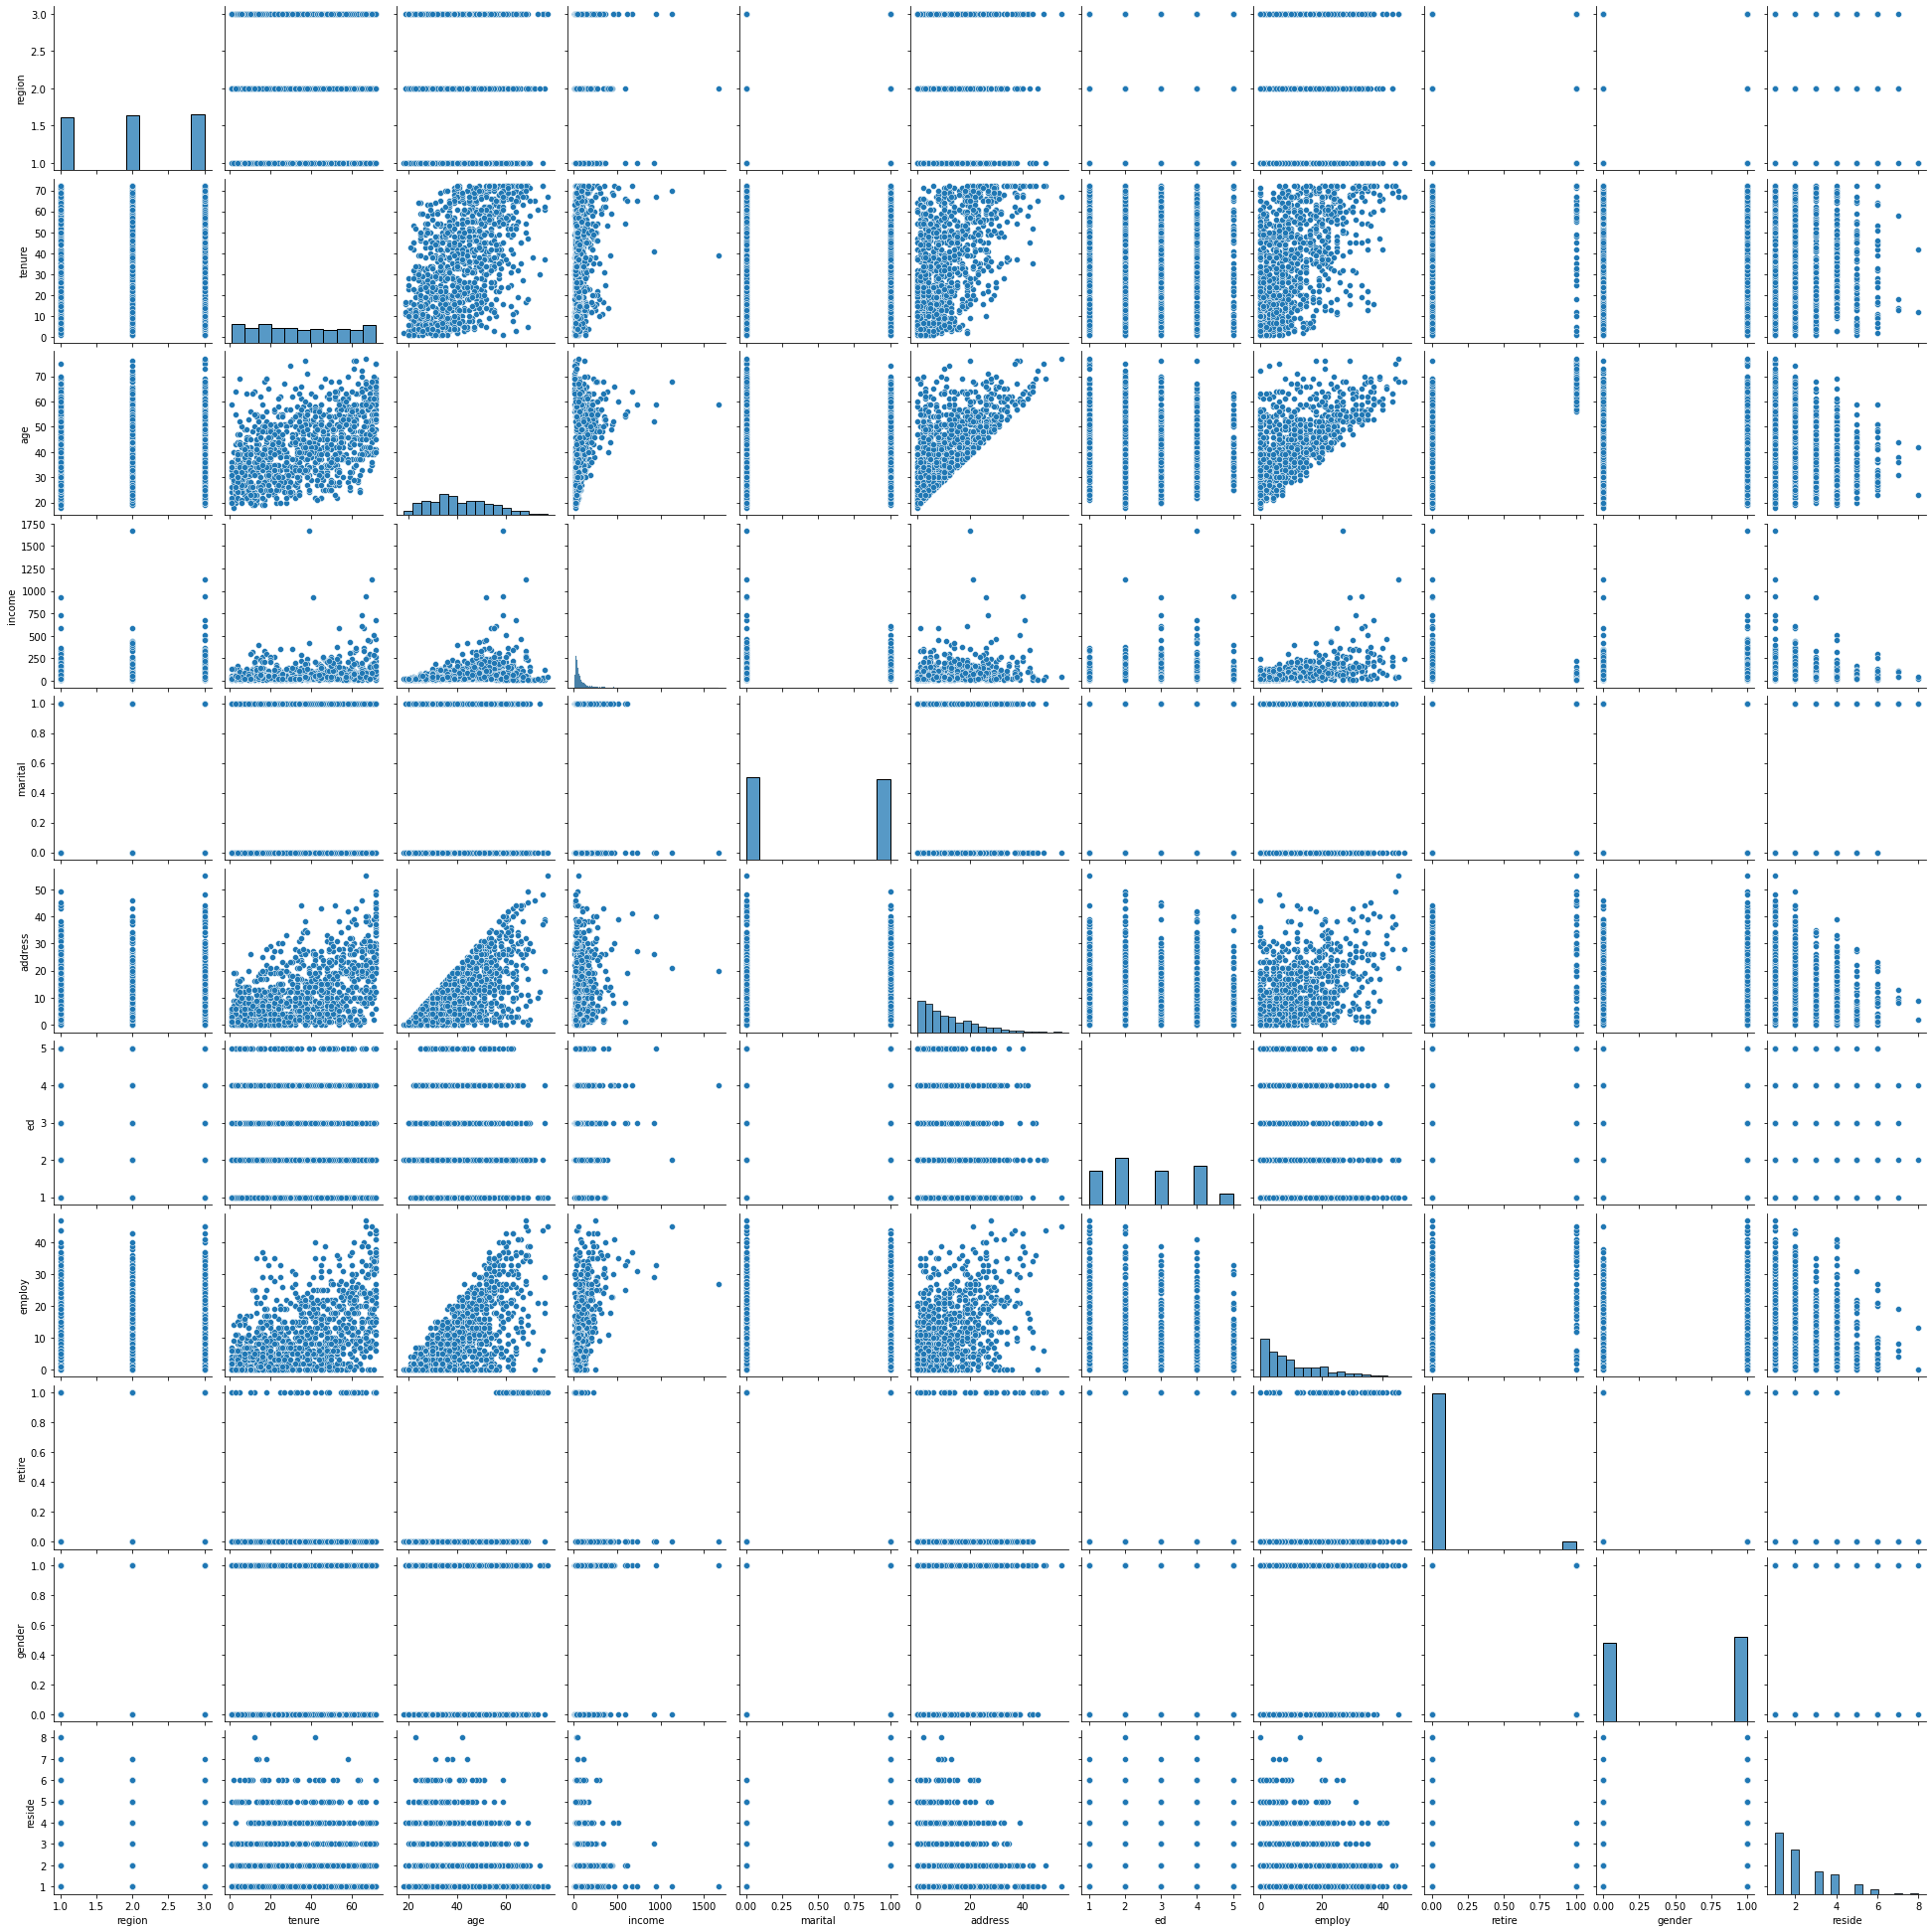

In [93]:
sns.pairplot(numericdf, markers=["o", "s", "D"])

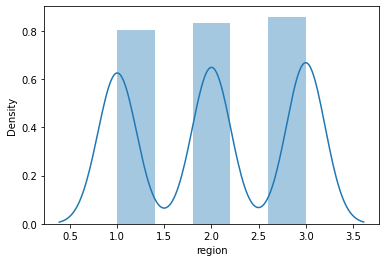

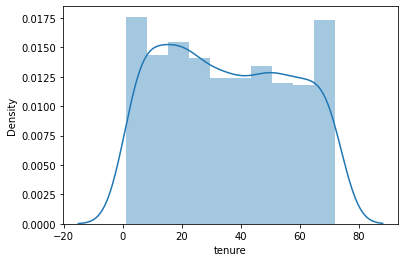

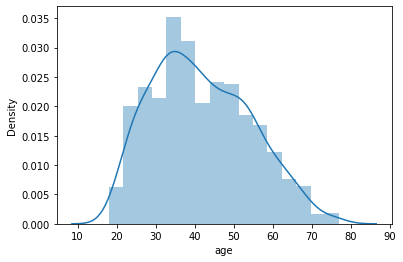

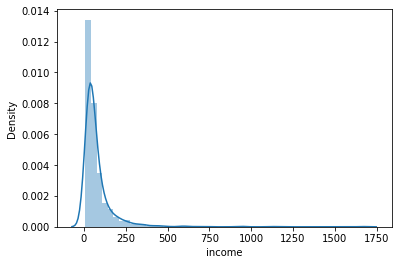

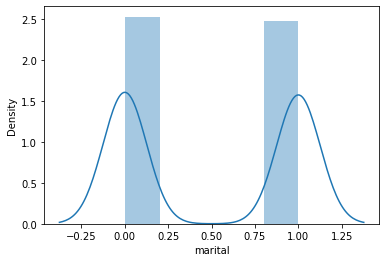

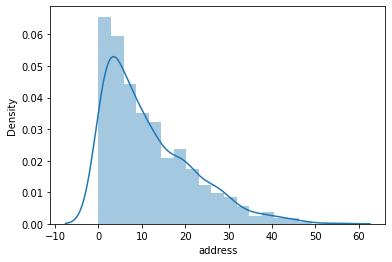

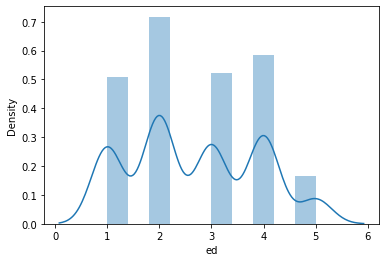

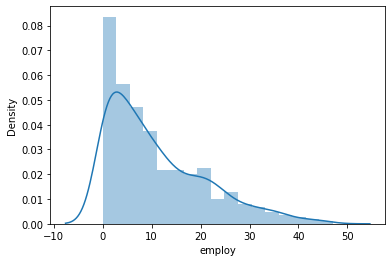

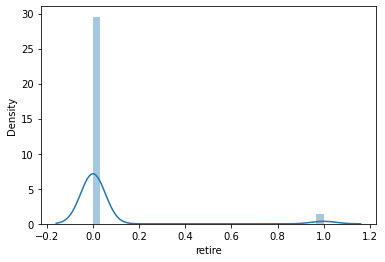

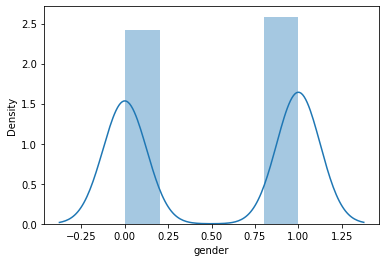

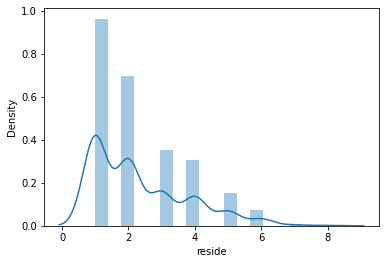

In [94]:
for i in numericdf.columns:
    sns.distplot(numericdf[i])
    plt.show()

In [95]:
not_numeric_new=[]
for label,content in df_raw.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric_new.append(label)
not_numeric_new

['custcat']

In [97]:
nonnumericdf=df_raw[not_numeric_new]

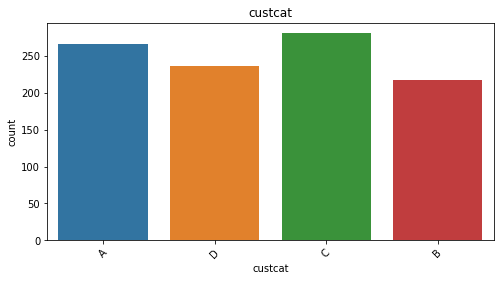

In [98]:
for col in not_numeric_new:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

## Outlier

In [99]:
from scipy import stats

In [100]:
df.shape

(1000, 10)

In [101]:
df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [102]:
df_new.shape

(924, 10)

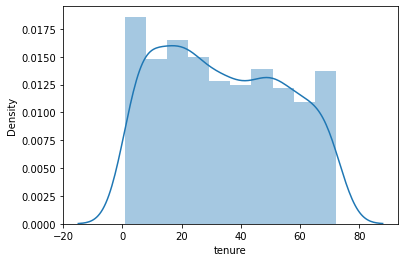

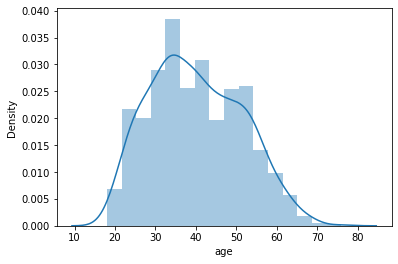

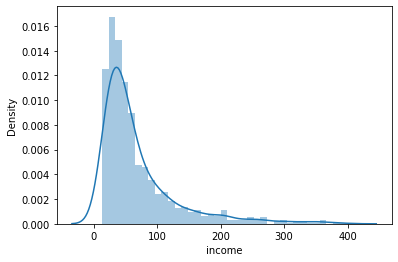

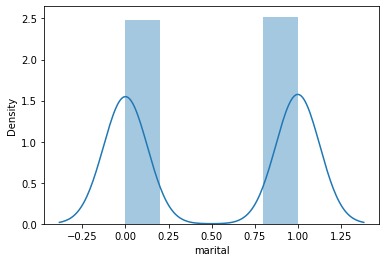

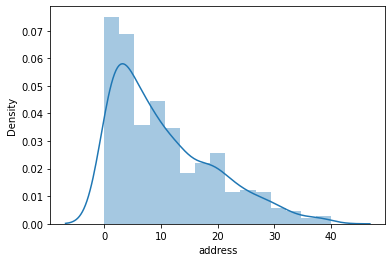

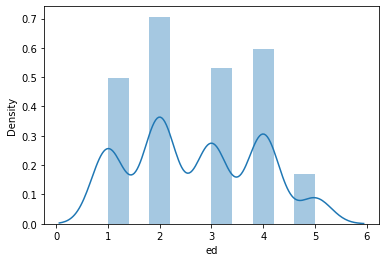

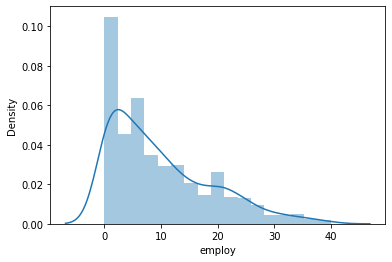

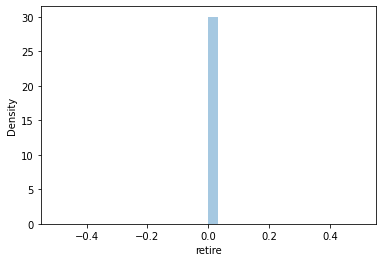

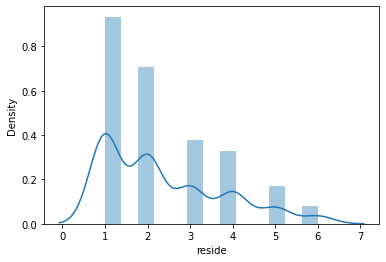

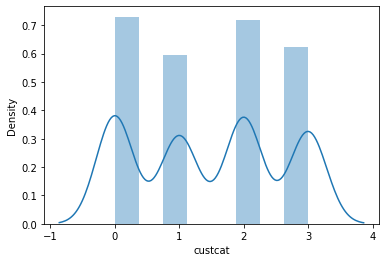

In [103]:
for i in df_new.columns:
    sns.distplot(df_new[i])
    plt.show()

## Splitting the data

In [104]:
X=df_new.drop('custcat',axis=1)
y=df_new['custcat']

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
X_train.columns

Index(['tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ',
       'retire', 'reside'],
      dtype='object')

## Saving Data in Pickle

In [107]:
X_train.to_pickle("./X_train.pkl")
X_test.to_pickle("./X_test.pkl")
y_train.to_pickle("./y_train.pkl")
y_test.to_pickle("./y_test.pkl")

X.to_pickle("./X.pkl")
y.to_pickle("./y.pkl")